In [29]:
import tensorflow as tf

In [30]:
tf.__version__

'2.1.0'

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input,Conv2D,Dense,Flatten,Dropout
from tensorflow.keras.models import Model

In [32]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [33]:
(X_train,y_train),(X_test,y_test)=fashion_mnist.load_data()

X_train,X_test = X_train/255.0,X_test/255.0

print('X_train shape : ',X_train.shape)

X_train shape :  (60000, 28, 28)


In [34]:
# the data is only 2d
# convolution expects height * width * color

In [35]:
X_train = np.expand_dims(X_train,-1)
X_test = np.expand_dims(X_test,-1)
print(X_train.shape)

(60000, 28, 28, 1)


In [36]:
#Number of classes

In [37]:
k=len(set(y_train))
print('number of classes : ',k)

number of classes :  10


In [38]:
i = Input(shape=X_train[0].shape)
x = Conv2D(32,(3,3),strides=2,activation='relu')(i)
x = Conv2D(64,(3,3),strides=2,activation='relu')(x)
x = Conv2D(128,(3,3),strides=2,activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512,activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(k,activation='softmax')(x)

model = Model(i,x)

In [39]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 6, 6, 64)          18496     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 2, 2, 128)         73856     
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               2626

In [40]:
#compile and fitting the model

In [41]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

r = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=15)

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 127s 2ms/sample - loss: 0.5200 - accuracy: 0.8074 - val_loss: 0.3957 - val_accuracy: 0.8516
Epoch 2/15
60000/60000 [==============================] - 112s 2ms/sample - loss: 0.3585 - accuracy: 0.8662 - val_loss: 0.3431 - val_accuracy: 0.8707
Epoch 3/15
60000/60000 [==============================] - 109s 2ms/sample - loss: 0.3085 - accuracy: 0.8842 - val_loss: 0.3157 - val_accuracy: 0.8840
Epoch 4/15
60000/60000 [==============================] - 108s 2ms/sample - loss: 0.2764 - accuracy: 0.8954 - val_loss: 0.2937 - val_accuracy: 0.8868
Epoch 5/15
60000/60000 [==============================] - 111s 2ms/sample - loss: 0.2516 - accuracy: 0.9055 - val_loss: 0.3003 - val_accuracy: 0.8934
Epoch 6/15
60000/60000 [==============================] - 107s 2ms/sample - loss: 0.2279 - accuracy: 0.9131 - val_loss: 0.3147 - val_accuracy: 0.8903
Epoch 7/15
60000/60000 [==========================

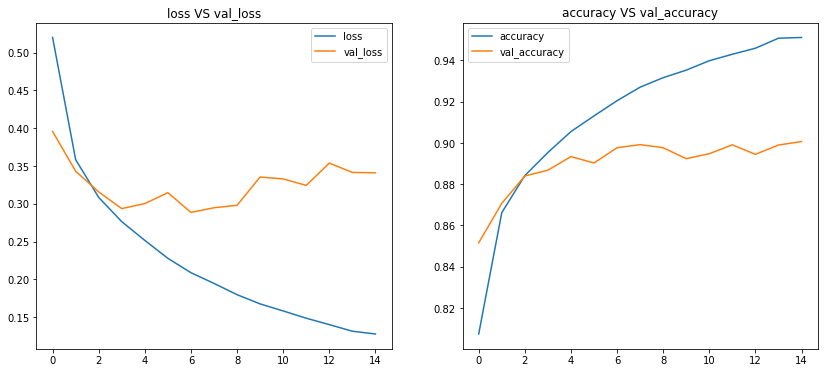

In [42]:
plt.figure(figsize=(14,6))
plt.subplot(121)
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.title("loss VS val_loss")
plt.legend()

plt.subplot(122)
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.title("accuracy VS val_accuracy")
plt.legend()

plt.show();

In [43]:
from sklearn.metrics import confusion_matrix
import itertools

Confusion_Matrix, without normalization
[[846   0  24  11   3   1 104   0  11   0]
 [  2 970   2  15   5   0   3   0   3   0]
 [ 13   1 871   6  46   0  60   0   3   0]
 [ 22   4  20 889  28   0  32   0   5   0]
 [  1   1  59  19 829   0  86   0   5   0]
 [  0   0   0   0   0 973   0  18   1   8]
 [ 92   0  71  17  72   1 726   0  21   0]
 [  0   0   0   0   0   9   0 962   0  29]
 [  1   0   3   3   2   2   3   2 983   1]
 [  0   0   0   0   0   4   1  37   0 958]]


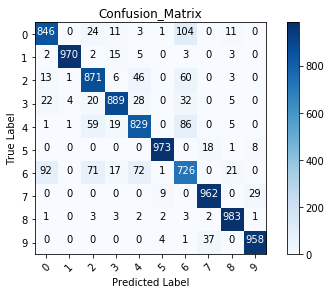

In [56]:
def plot_confusion_matrix(cm,classes,
                         normalize=False,
                         title='Confusion_Matrix',
                         cmap = plt.cm.Blues):
    """
    This function prints and plots the confusion Matrix.
    Normalization can be applied by setting normalized =True
    """
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        print('Normalized Confusion Matrix')
    else:
        print('Confusion_Matrix, without normalization')
    print(cm)
    
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max()/2.
    
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,format(cm[i,j],fmt),
                horizontalalignment='center',
                color='white' if cm[i,j]>thresh else 'black')
        
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
    
p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test,p_test)
plot_confusion_matrix(cm,list(range(10)))

In [45]:
#label mapping

In [46]:
labels = '''T-shirt/Top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split()

In [47]:
labels

['T-shirt/Top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle',
 'boot']

In [48]:
#Show Some Misclassified examples

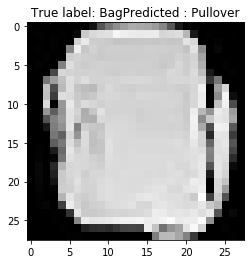

In [54]:
misclassified_idx = np.where(p_test!=y_test)[0]
i=np.random.choice(misclassified_idx)
plt.imshow(X_test[i].reshape(28,28),cmap='gray')
plt.title('True label: %sPredicted : %s' %(labels[y_test[i]],labels[p_test[i]]));